In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import os
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load position vector for each factor, motif masked or unmasked

COREDIR = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-GC-balanced/storage_cp/AgentBind-GM12878-DanQ/tmp/"
factors = ["BHLHE40", "CEBPB", "CTCF", "E2F4", "EBF1", "ELF1", "ELK1", "ETS1", "FOS", \
           "IRF4", "JunD", "Max", "MEF2A", "MEF2C", "Mxi1", "NFIC", "NFKB", "NFYA", \
           "NFYB", "Nrf1", "NRSF", "PAX5", "PBX3", "POU2F2", "PU1", "RFX5", "RUNX3", \
           "SP1", "SRF", "STAT1", "STAT3", "TCF3", "USF1", "USF2", "YY1", "ZBTB33", "ZEB1", "Znf143"]
#factors = ["SP1", "TCF3"]
weights_core = []
weights_masked = []

def LoadWeights(file):
    f = open(file, "r")
    locline = f.readline()
    wline = f.readline()
    aggweights = [0]*1000
    numloc = 0
    while locline.strip() != "":
        numloc += 1
        weights = [min(0.01, abs(float(item))) for item in wline.strip().split(";")]
        if locline.strip()[-1] == "-":
            weights = weights[::-1] 
        aggweights = [weights[i]+aggweights[i] for i in range(len(weights))]
        locline = f.readline()
        wline = f.readline()
    return [item*1.0/numloc for item in aggweights]

for f in factors:
    print(f)
    corefile = os.path.join(COREDIR, "%s+GM12878"%f, "seqs_one_hot_c/vis-weights-total/weight.txt")
    maskfile = os.path.join(COREDIR, "%s+GM12878"%f, "seqs_one_hot_b/vis-weights-total/weight.txt")
    corew = LoadWeights(corefile)
    corem = LoadWeights(maskfile)
    weights_core.append(corew)
    weights_masked.append(corem)

BHLHE40
CEBPB
CTCF
E2F4
EBF1
ELF1
ELK1
ETS1
FOS
IRF4
JunD
Max
MEF2A
MEF2C
Mxi1
NFIC
NFKB
NFYA
NFYB
Nrf1
NRSF
PAX5
PBX3
POU2F2
PU1
RFX5
RUNX3
SP1
SRF
STAT1
STAT3
TCF3
USF1
USF2
YY1
ZBTB33
ZEB1
Znf143


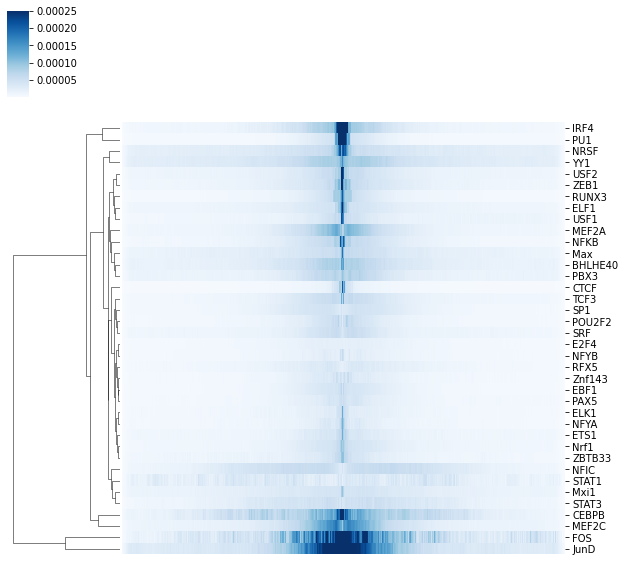

In [3]:
weights_core_df = pd.DataFrame(weights_core)
weights_core_df.index = factors

sns.clustermap(weights_core_df, col_cluster=False, cmap="Blues", xticklabels=False, vmax=0.00025);

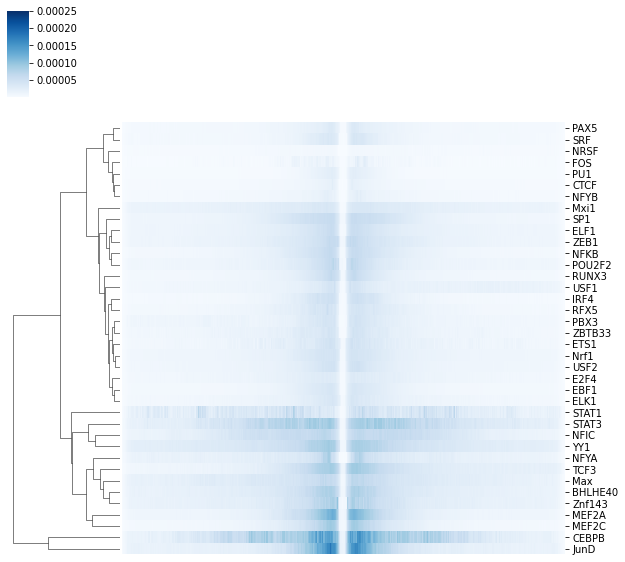

In [4]:
weights_mask_df = pd.DataFrame(weights_masked)
weights_mask_df.index = factors

sns.clustermap(weights_mask_df, col_cluster=False, cmap="Blues", xticklabels=False, vmax=0.00025);

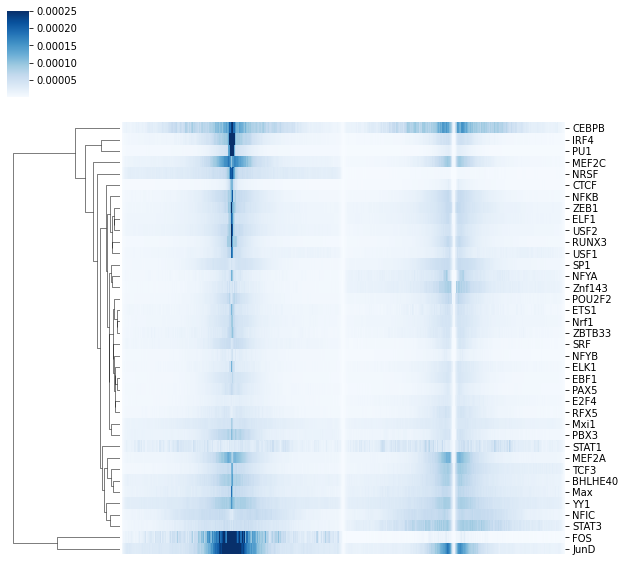

In [5]:
df_concat = pd.concat([weights_core_df, weights_mask_df], axis=1)
g = sns.clustermap(df_concat, col_cluster=False, cmap="Blues", xticklabels=False, vmax=0.00025);
g.savefig("AgentBind_Figure2_AggPatterns.pdf")

Nrf1
PU1
YY1
SP1
CTCF
MEF2A
YY1


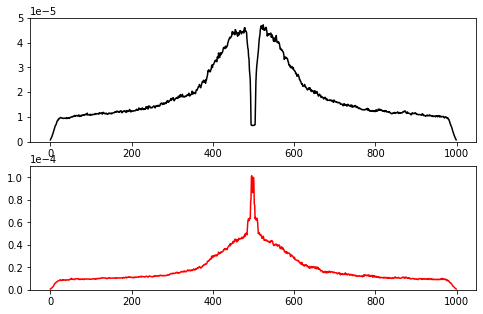

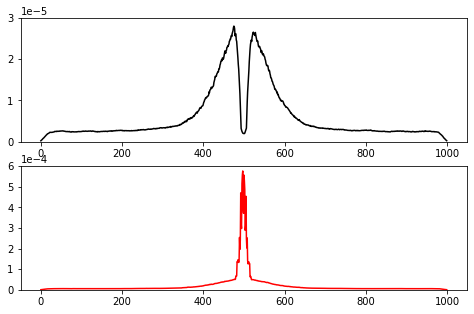

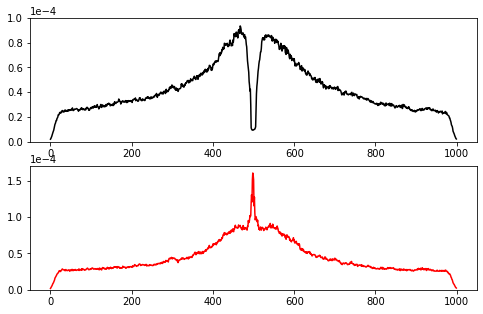

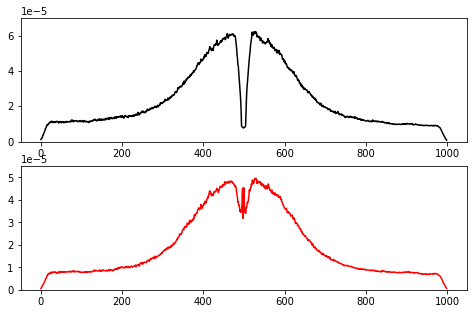

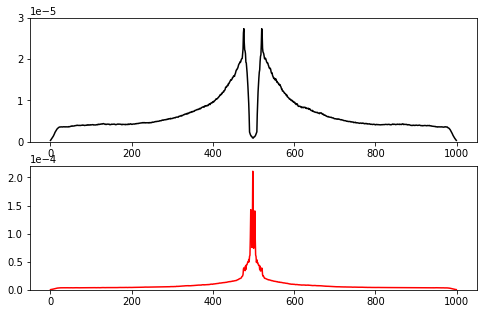

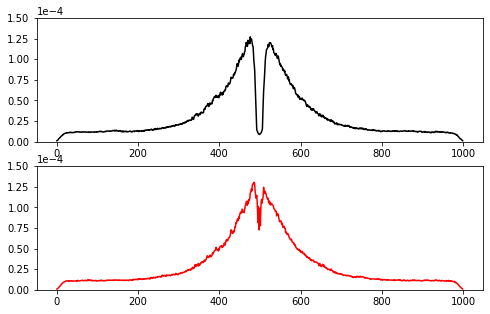

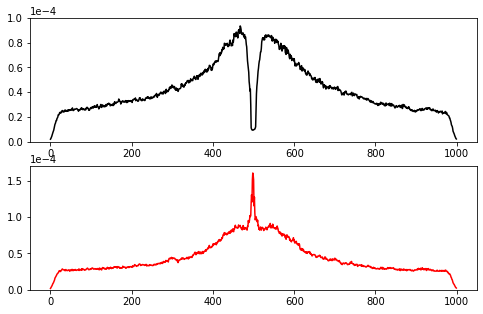

In [29]:
ylim_dict = {"Nrf1":{"b":5e-5, "c": 1.1e-4}, 
            "PU1":{"b":3e-5, "c": 6e-4},
             "YY1": {"b":1e-4, "c": 2e-4}, 
             "SP1":{"b":7e-5, "c": 5.5e-5},
             "CTCF": {"b":3e-5, "c": 2.2e-4},
             "MEF2A": {"b":1.5e-4, "c": 1.5e-4},
             "YY1":{"b":1e-4, "c": 1.7e-4}}
for factor in ["Nrf1","PU1","YY1", "SP1","CTCF","MEF2A","YY1"]:
    print (factor)
    fig = plt.figure()
    fig.set_size_inches((8, 5))
    wm = weights_masked[factors.index(factor)]
    wc = weights_core[factors.index(factor)]
    ax = fig.add_subplot(211)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.plot(range(len(wm)), wm, color="black");
    ax.set_ylim((0,ylim_dict[factor]["b"]))
    ax = fig.add_subplot(212)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.plot(range(len(wc)), wc, color="red");
    ax.set_ylim((0,ylim_dict[factor]["c"]))
    #fig.tight_layout()
    fig.savefig("AgentBind_Figure2_AggPatterns_%s.pdf"%factor)
    #plt.close()